# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market

### Business Goal 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Reading and Understanding the data 

#### Import the python libraries

In [1]:
#To supress the warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# load the data in data frame
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#Analyse the columns
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#number of rows and columns 
df.shape

(205, 26)

###### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [5]:
#split the column CarName and get the first substring for Car company
df['company'] =  df['CarName'].str.split(' ').str[0]

In [6]:
#unique values of the company
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
#Looking at the data, corresponding to newly created company column shows further cleaning of data is required 
df['company'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','vokswagen':'volkswagen','vw':'volkswagen','toyouta':'toyota'},inplace=True)

In [8]:
#Unique values of Company after cleaning the data 
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
#drop the CarName column as its obsolete
df = df.drop(['CarName'], axis=1)

In [11]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


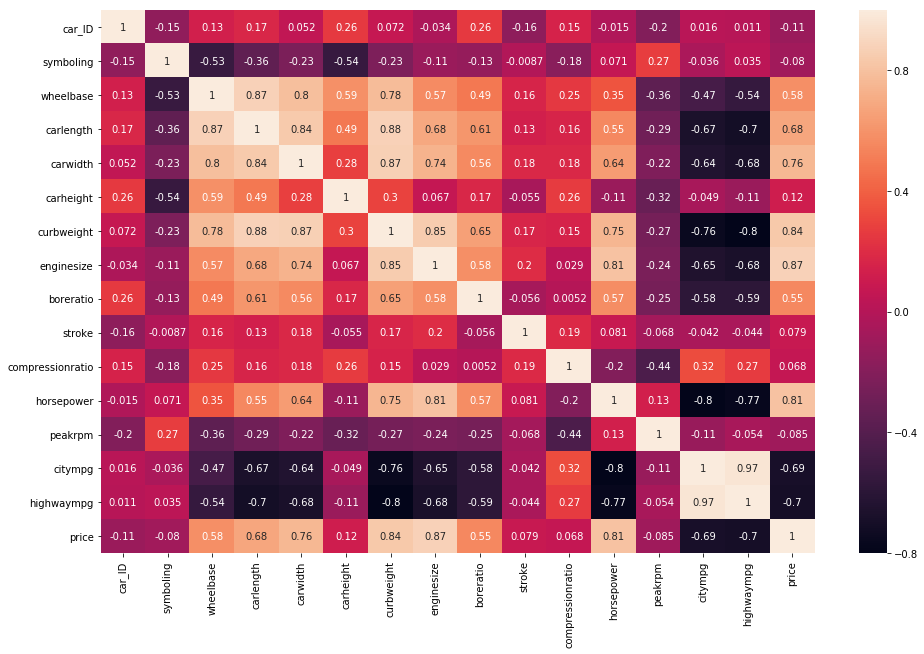

In [12]:
#heatmap
plt.figure(figsize = (16,10))  
sns.heatmap(df.corr(),annot = True)

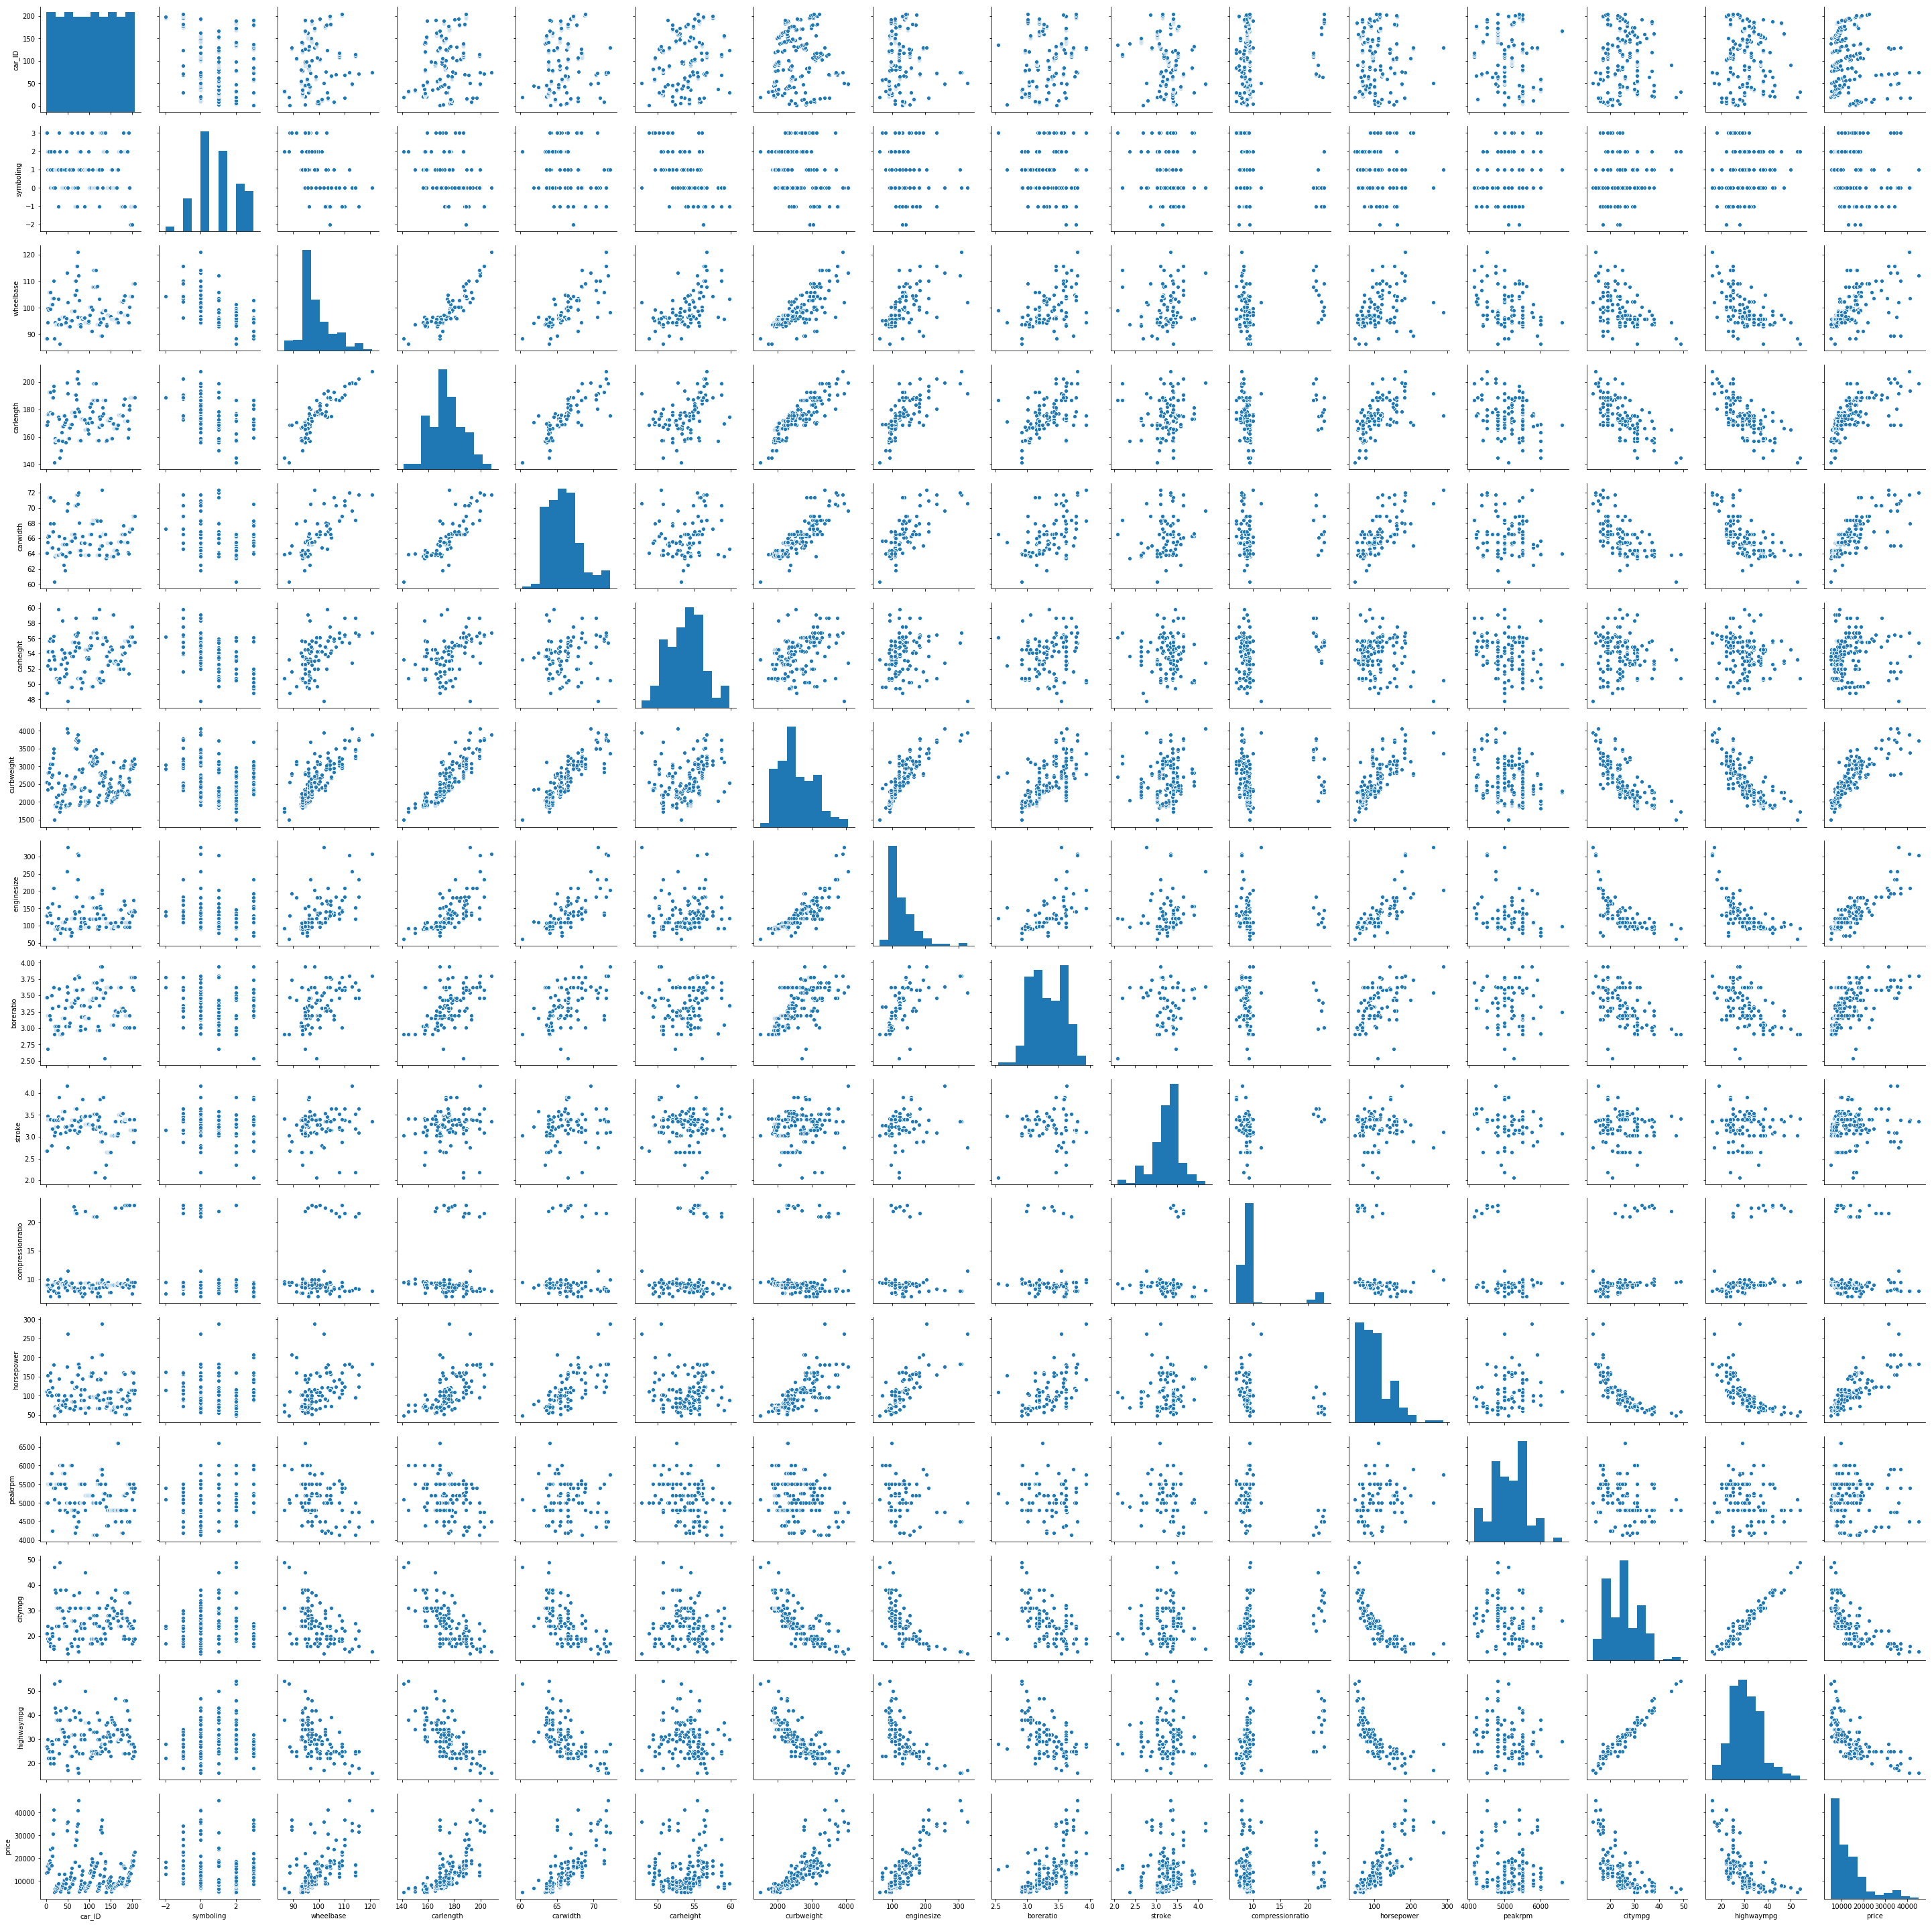

In [13]:
#visualing the numerical variables
sns.pairplot(df)
plt.show()

From above scatter plots and also the heat map as we can notice there is a high corelation between:
    1.carlength, curbweight, wheelbase and carwidth, so we can drop 3 out of 4, so lets drop carwidth and curbweight and wheelbase
    2.High corelation of .97 between highwaympg and citympg, so lets drop highwaympg

In [14]:
df.drop(['carwidth','curbweight','wheelbase' , 'highwaympg'], axis =1, inplace = True)

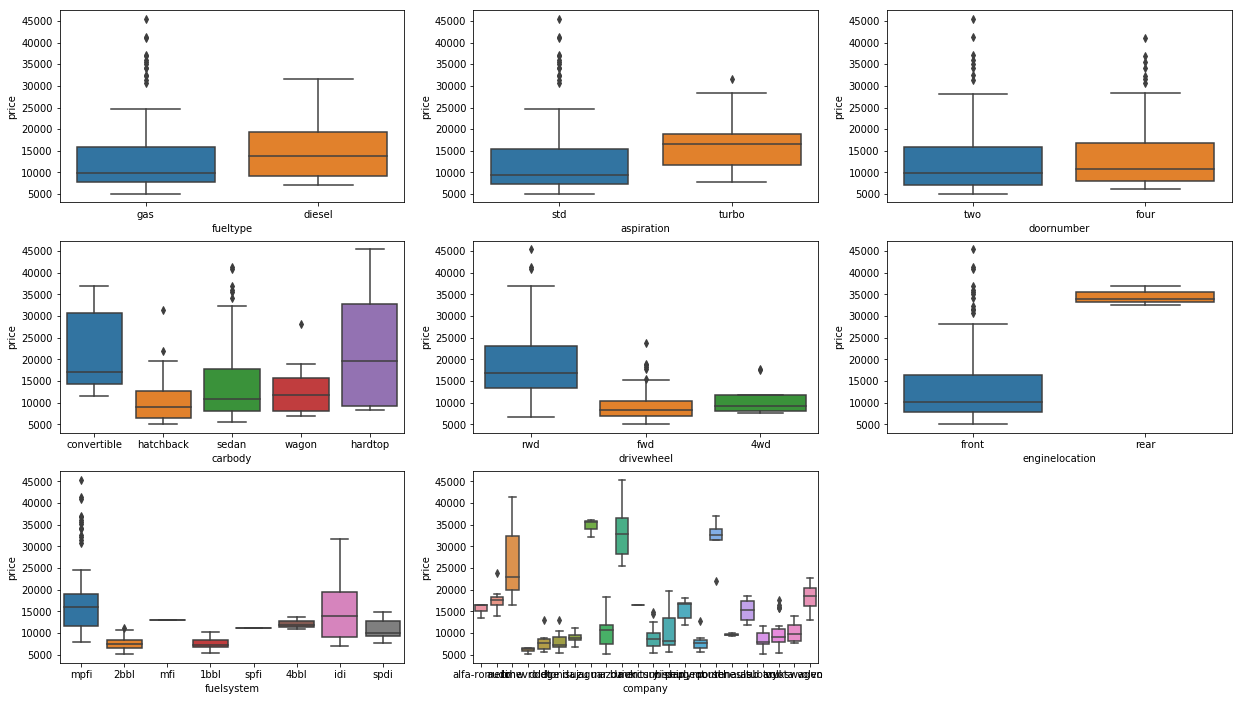

In [15]:
#visualiing the categorical variables
plt.figure(figsize=(21,12))
plt.subplot(3,3,1)
sns.boxplot(x="fueltype" , y = "price" , data = df)

plt.subplot(3,3,2)
sns.boxplot(x="aspiration" , y = "price" , data = df)

plt.subplot(3,3,3)
sns.boxplot(x="doornumber" , y = "price" , data = df)

plt.subplot(3,3,4)
sns.boxplot(x="carbody" , y = "price" , data = df)

plt.subplot(3,3,5)
sns.boxplot(x="drivewheel" , y = "price" , data = df)

plt.subplot(3,3,6)
sns.boxplot(x="enginelocation" , y = "price" , data = df)

plt.subplot(3,3,7)
sns.boxplot(x="fuelsystem" , y = "price" , data = df)

plt.subplot(3,3,8)
sns.boxplot(x="company" , y = "price" , data = df)

plt.show()

###### Encoding

In [16]:
#convert categorical to boolean values 0 or 1
df['fueltype'] = df['fueltype'].map({'gas':0,'diesel':1})
df['aspiration'] = df['aspiration'].map({'std':0,'turbo':1})
df['doornumber'] = df['doornumber'].map({'two':0,'four':1})
df['enginelocation'] = df['enginelocation'].map({'front':0,'rear':1})

In [17]:
#converting the categorical columns to get the dummy 
cols_categorical = df.select_dtypes(include=['object'])
cars_dummies = pd.get_dummies(cols_categorical, drop_first=True)

df=pd.merge(df,cars_dummies,on=df.index)

df.drop(cols_categorical, axis=1, inplace=True)


In [18]:
df.head()

,key_0,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,0,1,3,0,0,0,0,168.8,48.8,130,...,0,0,0,0,0,0,0,0,0,0
1,1,2,3,0,0,0,0,168.8,48.8,130,...,0,0,0,0,0,0,0,0,0,0
2,2,3,1,0,0,0,0,171.2,52.4,152,...,0,0,0,0,0,0,0,0,0,0
3,3,4,2,0,0,1,0,176.6,54.3,109,...,0,0,0,0,0,0,0,0,0,0
4,4,5,2,0,0,1,0,176.6,54.3,136,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#dropping Key_0 and car_ID
df.drop(['key_0','car_ID'], axis=1, inplace=True)

In [21]:
# Drop Duplicates if any
df=df.drop_duplicates()

Check for missing values in dataframe

In [22]:
# percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

symboling                0.0
fueltype                 0.0
aspiration               0.0
doornumber               0.0
enginelocation           0.0
carlength                0.0
carheight                0.0
enginesize               0.0
boreratio                0.0
stroke                   0.0
compressionratio         0.0
horsepower               0.0
peakrpm                  0.0
citympg                  0.0
price                    0.0
carbody_hardtop          0.0
carbody_hatchback        0.0
carbody_sedan            0.0
carbody_wagon            0.0
drivewheel_fwd           0.0
drivewheel_rwd           0.0
enginetype_dohcv         0.0
enginetype_l             0.0
enginetype_ohc           0.0
enginetype_ohcf          0.0
enginetype_ohcv          0.0
enginetype_rotor         0.0
cylindernumber_five      0.0
cylindernumber_four      0.0
cylindernumber_six       0.0
                        ... 
cylindernumber_twelve    0.0
cylindernumber_two       0.0
fuelsystem_2bbl          0.0
fuelsystem_4bb

Above information clearly shows that no missing value for any column

In [23]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan

###### Splitting the train and test 

In [24]:
#splitting the data 
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df.shape)
print(df_train.shape)
print(df_test.shape)

(205, 61)
(143, 61)
(62, 61)


###### Rescaling the Features using minmaxScaler

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 61 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
carlength                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
price                    205 non-null float64
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8
drivewheel_fwd           205 non-null uint8
dri

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['carlength' ,'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',  'horsepower', 'peakrpm', 'citympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


###### Training the model 

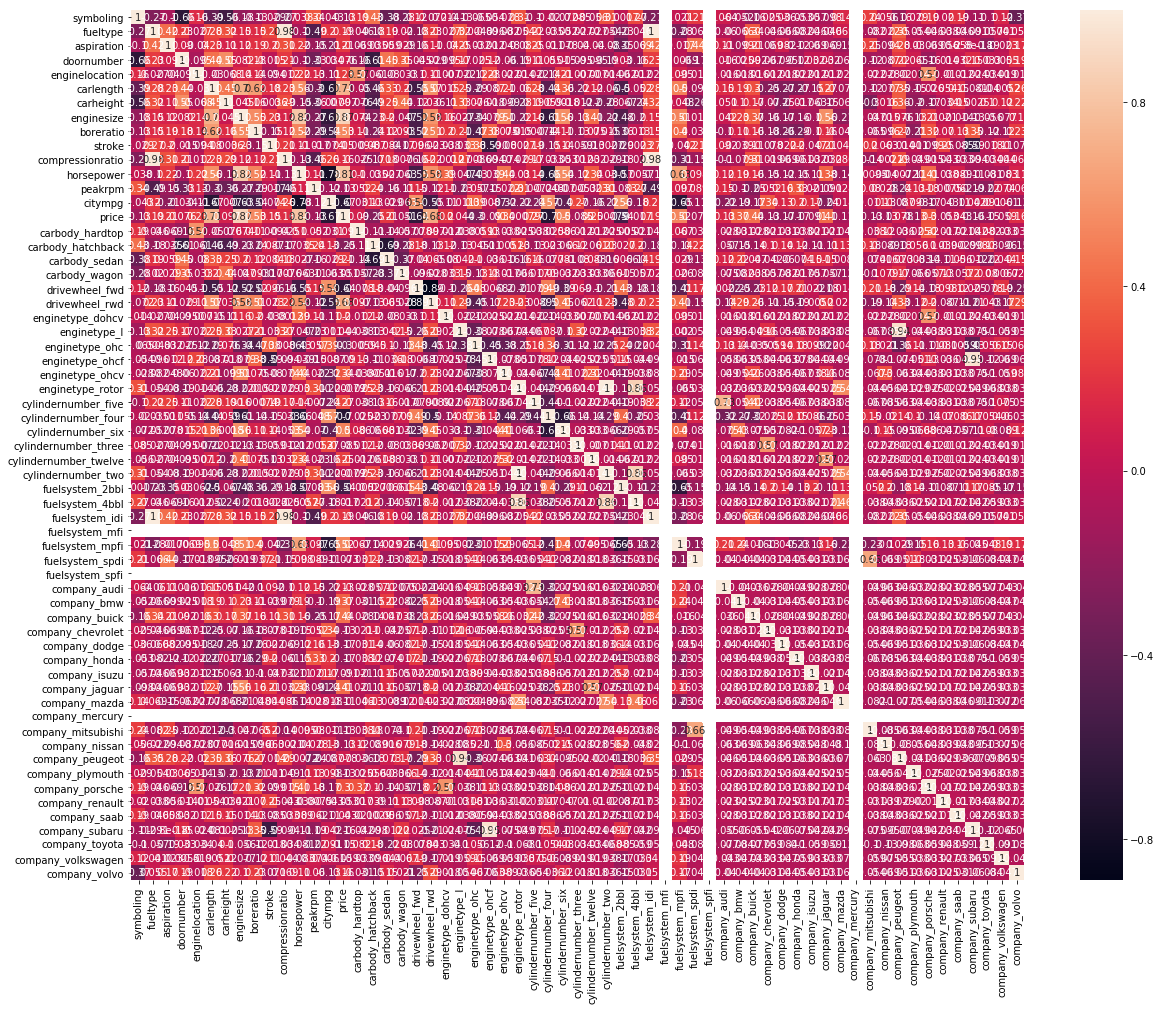

In [28]:
plt.figure(figsize = (20,16))
sns.heatmap(df_train.corr() , annot= True)
plt.show()
  

fueltype and fuelsystem_idi have strong correlation , Similarly enginetype_rotor and cylindernumber_two , enginetype_ohcf and company_subaru seems to have correlation.

In [29]:
#drop the columns which are highly correlated to remove the redundancy
df_train = df_train.drop(['fuelsystem_idi' , 'cylindernumber_two' , 'enginetype_ohcf'] , axis = 1)

In [30]:
y_train = df_train['price']
X_train = df_train.drop('price',axis=1)

In [31]:
df_train.dtypes

symboling                  int64
fueltype                   int64
aspiration                 int64
doornumber                 int64
enginelocation             int64
carlength                float64
carheight                float64
enginesize               float64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower               float64
peakrpm                  float64
citympg                  float64
price                    float64
carbody_hardtop            uint8
carbody_hatchback          uint8
carbody_sedan              uint8
carbody_wagon              uint8
drivewheel_fwd             uint8
drivewheel_rwd             uint8
enginetype_dohcv           uint8
enginetype_l               uint8
enginetype_ohc             uint8
enginetype_ohcv            uint8
enginetype_rotor           uint8
cylindernumber_five        uint8
cylindernumber_four        uint8
cylindernumber_six         uint8
cylindernumber_three       uint8
cylindernu

In [32]:
#Build a linear model
X = sm.add_constant(X_train)
lr = sm.OLS(y_train, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     47.44
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.05e-47
Time:                        10:15:57   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -408.7
Df Residuals:                      89   BIC:                            -248.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.68

In [33]:
def GetVIF(inputDF):
    vif = pd.DataFrame()
    X = inputDF 
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)
    

In [34]:
# Finding the VIFs for the variables
GetVIF(X)

,Features,VIF
22,enginetype_l,inf
49,company_peugeot,inf
29,cylindernumber_three,inf
0,const,2626.840000
27,cylindernumber_four,445.880000
8,enginesize,324.360000
2,fueltype,296.030000
11,compressionratio,271.420000
25,enginetype_rotor,97.560000
28,cylindernumber_six,84.680000


P-Values shows that some of the variables aren't really significant (in the presence of other variables).
We could simply drop the variable with the highest, non-significant p value. But a better way would be to find out the VIF and consider the VIF as well to drop the variable or not.  

1. p value and vif high (no such variable)
2. p value high and low vif (two)
3. low p value and high vif 
4. low p and low vif

In [35]:
X_train = X_train.drop('company_jaguar',axis=1)
y = y_train

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     48.90
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.91e-48
Time:                        10:16:01   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -410.7
Df Residuals:                      90   BIC:                            -253.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.67

In [36]:
GetVIF(X)

,Features,VIF
22,enginetype_l,inf
48,company_peugeot,inf
29,cylindernumber_three,inf
0,const,2326.800000
27,cylindernumber_four,396.370000
2,fueltype,284.220000
11,compressionratio,256.490000
8,enginesize,219.030000
25,enginetype_rotor,78.900000
28,cylindernumber_six,76.230000


In [37]:
#dropping the column spdi being insignificant of p-value.
X_train = X_train.drop(['compressionratio'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     50.41
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.06e-49
Time:                        10:16:03   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -412.7
Df Residuals:                      91   BIC:                            -258.6
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.67

strong multicollinearity problems 

 Let's remove the variables with high correlation &amp; insignificant predictors using RFE. 

In [38]:
lm = LinearRegression()
rfe = RFE(lm,15) 
rfe = rfe.fit(X_train, y) 

In [39]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('const', False, 36),
 ('symboling', False, 24),
 ('fueltype', False, 8),
 ('aspiration', False, 28),
 ('doornumber', True, 1),
 ('enginelocation', True, 1),
 ('carlength', False, 19),
 ('carheight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 15),
 ('horsepower', False, 13),
 ('peakrpm', False, 34),
 ('citympg', False, 12),
 ('carbody_hardtop', False, 9),
 ('carbody_hatchback', False, 11),
 ('carbody_sedan', False, 10),
 ('carbody_wagon', False, 37),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 30),
 ('enginetype_ohc', False, 38),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 25),
 ('fuelsystem_2bbl', False, 27),
 ('fuelsystem_4bbl', False, 40),
 ('fuelsystem_mfi', False, 26),
 ('fuelsys

In [40]:
X_train.columns
cols_to_drop = X_train.columns[~rfe.support_]
cols_to_drop

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carheight',
       'horsepower', 'peakrpm', 'citympg', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_audi', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_mazda',
       'company_mercury', 'company_mitsubishi', 'company_nissan',
       'company_plymouth', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo'],
      dtype='object')

In [41]:
X_train = X_train.drop(cols_to_drop,1)
X_train.columns

Index(['enginelocation', 'carlength', 'enginesize', 'boreratio', 'stroke',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'company_bmw', 'company_peugeot',
       'company_porsche'],
      dtype='object')

In [42]:
X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     95.89
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.07e-60
Time:                        10:16:06   Log-Likelihood:                 191.50
No. Observations:                 143   AIC:                            -353.0
Df Residuals:                     128   BIC:                            -308.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

Still having multicollinearity problem 

In [43]:
GetVIF(X)

,Features,VIF
7,enginetype_l,inf
11,cylindernumber_three,inf
14,company_peugeot,inf
0,const,66.970000
3,enginesize,20.680000
10,cylindernumber_four,13.940000
4,boreratio,6.250000
8,enginetype_rotor,5.400000
2,carlength,4.020000
15,company_porsche,3.320000


In [44]:
X_train = X_train.drop(['enginetype_dohcv'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     102.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.01e-61
Time:                        10:16:06   Log-Likelihood:                 190.75
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     129   BIC:                            -312.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [45]:
GetVIF(X)

,Features,VIF
6,enginetype_l,inf
10,cylindernumber_three,inf
13,company_peugeot,inf
0,const,64.940000
3,enginesize,20.440000
9,cylindernumber_four,13.460000
4,boreratio,6.190000
7,enginetype_rotor,5.290000
2,carlength,4.010000
11,cylindernumber_twelve,2.840000


In [46]:
X_train = X_train.drop(['enginelocation'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.92e-62
Time:                        10:16:07   Log-Likelihood:                 189.46
No. Observations:                 143   AIC:                            -352.9
Df Residuals:                     130   BIC:                            -314.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [47]:
GetVIF(X)

,Features,VIF
5,enginetype_l,inf
9,cylindernumber_three,inf
12,company_peugeot,inf
0,const,64.220000
2,enginesize,20.420000
8,cylindernumber_four,13.440000
3,boreratio,6.180000
6,enginetype_rotor,5.290000
1,carlength,4.000000
10,cylindernumber_twelve,2.830000


In [48]:
X_train = X_train.drop(['enginetype_l'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.92e-62
Time:                        10:16:09   Log-Likelihood:                 189.46
No. Observations:                 143   AIC:                            -352.9
Df Residuals:                     130   BIC:                            -314.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [49]:
GetVIF(X)

,Features,VIF
0,const,64.22
2,enginesize,20.42
7,cylindernumber_four,13.44
3,boreratio,6.18
5,enginetype_rotor,5.29
1,carlength,4.00
9,cylindernumber_twelve,2.83
6,cylindernumber_five,2.57
4,stroke,2.44
8,cylindernumber_three,1.80


In [50]:
X_train = X_train.drop(['company_peugeot'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           7.94e-63
Time:                        10:16:09   Log-Likelihood:                 189.01
No. Observations:                 143   AIC:                            -354.0
Df Residuals:                     131   BIC:                            -318.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [51]:
GetVIF(X)

,Features,VIF
0,const,57.73
2,enginesize,20.33
7,cylindernumber_four,12.84
3,boreratio,6.12
5,enginetype_rotor,5.20
1,carlength,3.37
9,cylindernumber_twelve,2.82
6,cylindernumber_five,2.57
4,stroke,2.42
8,cylindernumber_three,1.73


In [52]:
X_train = X_train.drop(['enginesize'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     62.49
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.77e-45
Time:                        10:16:10   Log-Likelihood:                 141.82
No. Observations:                 143   AIC:                            -261.6
Df Residuals:                     132   BIC:                            -229.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.03

In [53]:
GetVIF(X)

,Features,VIF
0,const,41.11
1,carlength,3.28
2,boreratio,2.60
6,cylindernumber_four,2.55
5,cylindernumber_five,1.46
10,company_porsche,1.44
4,enginetype_rotor,1.34
3,stroke,1.22
9,company_bmw,1.22
7,cylindernumber_three,1.21


In [54]:
X_train = X_train.drop(['cylindernumber_five'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     69.66
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.52e-46
Time:                        10:16:11   Log-Likelihood:                 141.56
No. Observations:                 143   AIC:                            -263.1
Df Residuals:                     133   BIC:                            -233.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [55]:
GetVIF(X)

,Features,VIF
0,const,39.08
1,carlength,3.27
2,boreratio,2.59
5,cylindernumber_four,2.06
9,company_porsche,1.43
4,enginetype_rotor,1.28
3,stroke,1.22
6,cylindernumber_three,1.19
8,company_bmw,1.14
7,cylindernumber_twelve,1.07


In [56]:
X_train = X_train.drop(['cylindernumber_three'] , axis = 1)

X = sm.add_constant(X_train)
lr = sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     77.98
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.18e-46
Time:                        10:16:11   Log-Likelihood:                 140.83
No. Observations:                 143   AIC:                            -263.7
Df Residuals:                     134   BIC:                            -237.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [57]:
GetVIF(X)

,Features,VIF
0,const,34.81
1,carlength,2.94
2,boreratio,2.54
5,cylindernumber_four,1.82
8,company_porsche,1.39
4,enginetype_rotor,1.23
3,stroke,1.22
7,company_bmw,1.14
6,cylindernumber_twelve,1.07


###### All the independent variable have VIFs and p-values both within an acceptable range. Adj. R-Squared is 0.813 which is quite a significant fit. We will conclude with the above variables as the final model predictor variables and can go ahead and make our predictions using this model only 

###### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like. 

In [58]:
y_train_pred = lr.predict(X)

Text(0.5, 0, 'Error')

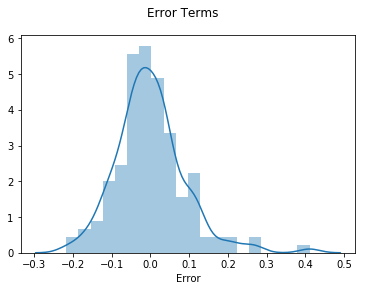

In [59]:
fig = plt.figure()
sns.distplot((y - y_train_pred), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Error') 

###### Making Predictions Using the Final Model


Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [60]:
num_vars = ['carlength' ,'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower',  'peakrpm', 'citympg','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [61]:
y_test = df_test.pop('price')
X_test = df_test

In [62]:
X_test_ml = sm.add_constant(X_test)

In [63]:
X_test_ml.columns

Index(['const', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'carlength', 'carheight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan

In [64]:

X_test_ml = X_test_ml.drop(['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation','enginesize' ,  'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv',  'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi',  'cylindernumber_five', 'cylindernumber_six', 'cylindernumber_three',  'cylindernumber_two', 'company_audi', 
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar', 'company_mazda',
       'company_mercury', 'company_mitsubishi', 'company_nissan', 'company_peugeot', 'company_plymouth', 
       'company_renault', 'company_saab', 'company_subaru', 'company_toyota', 'company_volkswagen', 'company_volvo'], axis = 1)

In [65]:
y_pred = lr.predict(X_test_ml)

In [68]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.10066273384162572


Text(0, 0.5, 'y_pred')

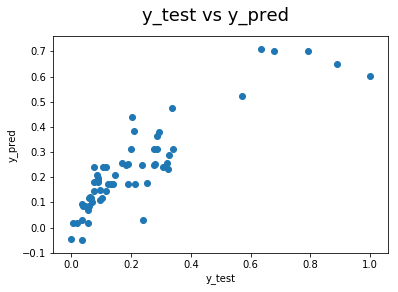

In [69]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18)               
plt.xlabel('y_test')     

plt.ylabel('y_pred')  

###### We can see that the equation of our best fitted line is:

price = 0.36*carlength + 0.19*boreratio + 0.14*stroke - 0.12*enginetype_rotor - 0.21*cylinernumber_four + 0.38*cylinernumber_twelve + 0.19*company_bmw + 0.31*company_porsche 

In [70]:
#As per asked in Assignment 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

print('r2score :' , r2_score(y_test, y_pred))

r2score : 0.768473548197105
